## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import random

# Study data files
mouse_metadata_path = 'resources/mouse_metadata.csv'
study_results_path = 'resources/Study_results.csv'

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(study_results, mouse_metadata, how='inner', on='Mouse ID')

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mice_num = combined_data_df['Mouse ID'].nunique()
print(f'There are {mice_num} mice.')

There are 249 mice.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_df = combined_data_df[combined_data_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicates_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional:

# First, create a variable for the duplicate mouse ID
dup_mouse_id = duplicates_df.iloc[0,0]

# Get all the data for the duplicate mouse ID.
all_duplicates_df = combined_data_df.loc[combined_data_df['Mouse ID'] == dup_mouse_id, : ]
all_duplicates_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data_df = pd.DataFrame(combined_data_df[combined_data_df['Mouse ID'] != dup_mouse_id])
cleaned_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_mice_df = cleaned_data_df['Mouse ID'].nunique()
print(f'There are {unique_mice_df} unique mice.')

There are 248 unique mice.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_data_df = cleaned_data_df.groupby(['Drug Regimen'])

# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = regimen_data_df['Tumor Volume (mm3)'].mean()
median = regimen_data_df['Tumor Volume (mm3)'].median()
var = regimen_data_df['Tumor Volume (mm3)'].var()
stdev = regimen_data_df['Tumor Volume (mm3)'].std()
sem = regimen_data_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_stats_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Variance': var, 'Std. Deviaion': stdev, 'Std. Error': sem})
summary_stats_df

,Mean,Median,Variance,Std. Deviaion,Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
alt_summary_stats_df = cleaned_data_df.groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
alt_summary_stats_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

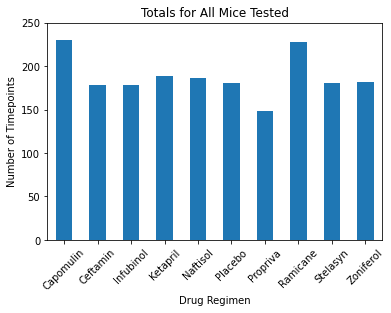

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
regimen_data_df['Timepoint'].count().plot(kind='bar', 
                                          title='Totals for All Mice Tested', 
                                          xlabel='Drug Regimen',
                                          ylabel='Number of Timepoints', 
                                          ylim=(0, 250), 
                                          rot=45, 
                                          align='center', 
                                          figsize=(6,4))
plt.show()

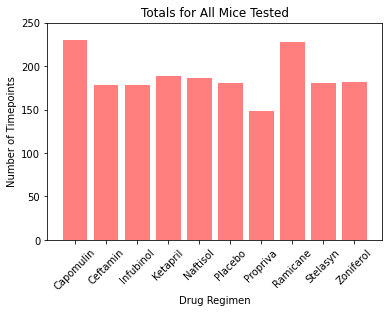

In [10]:
# Count the total number of timepoints for all mice tested
measurements = regimen_data_df['Timepoint'].count()

# Create a list of drug regimens
regimens = list(measurements.index.values)

# Format the x-axis and tick locations
x_axis = np.arange(len(measurements))
tick_locations = [value for value in x_axis]

# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.figure(figsize=(6,4))
plt.bar(x_axis, measurements, color='r', alpha=0.5, align='center')
plt.xticks(tick_locations, regimens, rotation=45)
plt.title('Totals for All Mice Tested')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.ylim(0, 250)
plt.show()

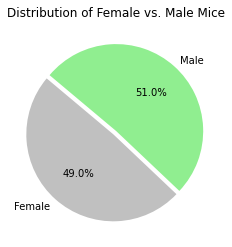

In [11]:
# Format the colors
colors = ['silver', 'lightgreen']

# Change the explode options 
explode = (0.05, 0)

# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_data = cleaned_data_df.groupby(['Sex'])
sex_data.size().plot(kind='pie', 
                     title='Distribution of Female vs. Male Mice', 
                     ylabel='', 
                     explode=explode, 
                     colors=colors, 
                     autopct='%1.1f%%', 
                     startangle=140)
plt.show()

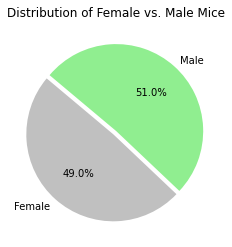

In [12]:
# Make a series to count male and female mice
sex = pd.Series(sex_data['Sex'].count())

# Create labels for the pie chart based on data in the series
labels = list(sex.index.values)

# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=140)
plt.title('Distribution of Female vs. Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = cleaned_data_df.groupby(['Mouse ID']).max()['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_timepoint_df = pd.merge(last_timepoint_df, cleaned_data_df, how='inner', on=['Mouse ID', 'Timepoint'])
new_timepoint_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Put treatments into a list for for loop (and later for plot labels)
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = new_timepoint_df.loc[new_timepoint_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_list.append(tumor_vol)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = round(tumor_vol.quantile([0.25,0.5,0.75]), 3)
    lowerq = round(quartiles[0.25], 3)
    upperq = round(quartiles[0.75], 3)
    iqr = round(upperq - lowerq, 3)

    # Print a summary of findings
    print(f'Summary of {treatment}:')
    print(f' • The lower quartile is {lowerq}')
    print(f' • The upper quartile is {upperq}')
    print(f' • The interquartile range is {iqr}')
    print(f' • The median is {quartiles[0.5]}')
    
    # Determine outliers using upper and lower bounds
    lower_bound = round(lowerq - (1.5*iqr), 3)
    upper_bound = round(upperq + (1.5*iqr), 3)
    print(f' • Values below {lower_bound} could be outliers.')
    print(f' • Values above {upper_bound} could be outliers.')
    print('\n')

Summary of Capomulin:
 • The lower quartile is 32.377
 • The upper quartile is 40.159
 • The interquartile range is 7.782
 • The median is 38.125
 • Values below 20.704 could be outliers.
 • Values above 51.832 could be outliers.


Summary of Ramicane:
 • The lower quartile is 31.56
 • The upper quartile is 40.659
 • The interquartile range is 9.099
 • The median is 36.562
 • Values below 17.911 could be outliers.
 • Values above 54.308 could be outliers.


Summary of Infubinol:
 • The lower quartile is 54.049
 • The upper quartile is 65.526
 • The interquartile range is 11.477
 • The median is 60.165
 • Values below 36.834 could be outliers.
 • Values above 82.742 could be outliers.


Summary of Ceftamin:
 • The lower quartile is 48.722
 • The upper quartile is 64.3
 • The interquartile range is 15.578
 • The median is 59.852
 • Values below 25.355 could be outliers.
 • Values above 87.667 could be outliers.




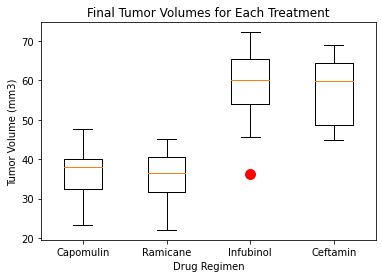

In [15]:
# Format the flierprops aka outliers
fliers = dict(marker='o', markerfacecolor='r', markersize=12, linestyle='none', markeredgecolor='w')

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_list, labels=treatments, flierprops=fliers)
plt.title("Final Tumor Volumes for Each Treatment")
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

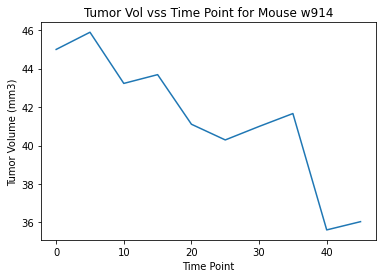

In [26]:
# First, find all Capomulin mice
capomulin_df = cleaned_data_df.loc[(cleaned_data_df['Drug Regimen'] == 'Capomulin')]

# Drop all duplicates
capomulin_clean_df = capomulin_df.drop_duplicates(subset = 'Mouse ID')

# Save the remaining mice to a list
capomulin_clean_df = capomulin_clean_df['Mouse ID'].tolist()

# Select a mouse ID at random
random_mouse = random.choice(capomulin_clean_df)

# Filter for the random selection 
capomulin_mouse_df = cleaned_data_df[cleaned_data_df['Mouse ID'] == random_mouse]

# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse_df.plot(kind='line', 
                        x='Timepoint', 
                        y='Tumor Volume (mm3)', 
                        xlabel='Time Point', 
                        ylabel='Tumor Volume (mm3)', 
                        title=f'Tumor Vol vss Time Point for Mouse {random_mouse}', 
                        legend=None)
plt.show()

## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
